In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv


In [2]:
import folium

In [3]:
data=pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [4]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [5]:
data['Province/State'].isnull().sum()

144

In [6]:
data.Date.unique()

array(['1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 PM',
       '1/25/2020 10:00 PM', '1/26/2020 23:00', '1/27/2020 20:30',
       '1/28/2020 23:00', '1/29/2020 21:00', '1/30/2020 21:30',
       '1/31/2020 19:00', '2020-01-02 23:00:00', '2020-02-02 21:00:00'],
      dtype=object)

In [7]:
data=data.replace(to_replace ="2020-01-02 23:00:00", 
                 value ="2020-02-01 23:00:00")

In [8]:
data.Date.unique()

array(['1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 PM',
       '1/25/2020 10:00 PM', '1/26/2020 23:00', '1/27/2020 20:30',
       '1/28/2020 23:00', '1/29/2020 21:00', '1/30/2020 21:30',
       '1/31/2020 19:00', '2020-02-01 23:00:00', '2020-02-02 21:00:00'],
      dtype=object)

In [9]:
data.dtypes

Sno                 int64
Date               object
Province/State     object
Country            object
Last Update        object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

In [10]:
data['Last Update']= pd.to_datetime(data['Last Update']) 

In [11]:
#19-nCoV, 31 January 2020**")
from datetime import date


In [12]:
data_final=data[(data['Last Update'] >= '2020-2-2 00:00:00') & (data['Last Update'] < '2020-3-2 00:00:00')]

In [13]:
data_final=data_final.drop(["Sno"],axis=1)

In [14]:
data_final=data_final.reset_index(drop=True)

In [15]:
data_final.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-02-01 23:00:00,Zhejiang,Mainland China,2020-02-02 02:13:00,661.0,0.0,23.0
1,2020-02-01 23:00:00,Guangdong,Mainland China,2020-02-02 01:23:00,604.0,0.0,14.0
2,2020-02-01 23:00:00,Henan,Mainland China,2020-02-02 00:53:00,493.0,2.0,4.0
3,2020-02-01 23:00:00,Hunan,Mainland China,2020-02-02 01:53:00,463.0,0.0,8.0
4,2020-02-01 23:00:00,Anhui,Mainland China,2020-02-02 01:33:00,340.0,0.0,5.0


In [16]:
data.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK'], dtype=object)

In [17]:
data=data.replace(to_replace ="China", 
                 value ="Mainland China")

In [18]:
data.Country.unique()

array(['Mainland China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines',
       'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'Sweden', 'Russia', 'Spain', 'UK'], dtype=object)

In [19]:
print('Total Confirmed Cases:',data_final['Confirmed'].sum())
print('Total Deaths: ',data_final['Deaths'].sum())
print('Total Recovered Cases: ',data_final['Recovered'].sum())

Total Confirmed Cases: 17348.0
Total Deaths:  366.0
Total Recovered Cases:  434.0


In [20]:
data.dtypes

Sno                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [21]:
from datetime import date

In [22]:
data_final.shape

(51, 7)

In [23]:
#data_final=data_final.drop(["Date"],axis=1)

In [24]:
countries=data_final.groupby(["Country"]).sum().reset_index()

In [25]:
countries

,Country,Confirmed,Deaths,Recovered
0,Australia,4.0,0.0,0.0
1,Germany,10.0,0.0,0.0
2,Hong Kong,29.0,0.0,0.0
3,India,2.0,0.0,0.0
4,Macau,8.0,0.0,0.0
5,Mainland China,17220.0,364.0,434.0
6,Philippines,4.0,2.0,0.0
7,Singapore,36.0,0.0,0.0
8,South Korea,30.0,0.0,0.0
9,United Arab Emirates,5.0,0.0,0.0


Mainland China has maximum confirmed cases of 17220 as of 2nd Feb ,India has 2.0

In [26]:
countries.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,4.0,0.0,0.0
1,Germany,10.0,0.0,0.0
2,Hong Kong,29.0,0.0,0.0
3,India,2.0,0.0,0.0
4,Macau,8.0,0.0,0.0


In [27]:
top10_countries=countries.nlargest(10,['Confirmed']).reset_index(drop=True)

In [28]:
top10_countries.head()

,Country,Confirmed,Deaths,Recovered
0,Mainland China,17220.0,364.0,434.0
1,Singapore,36.0,0.0,0.0
2,South Korea,30.0,0.0,0.0
3,Hong Kong,29.0,0.0,0.0
4,Germany,10.0,0.0,0.0


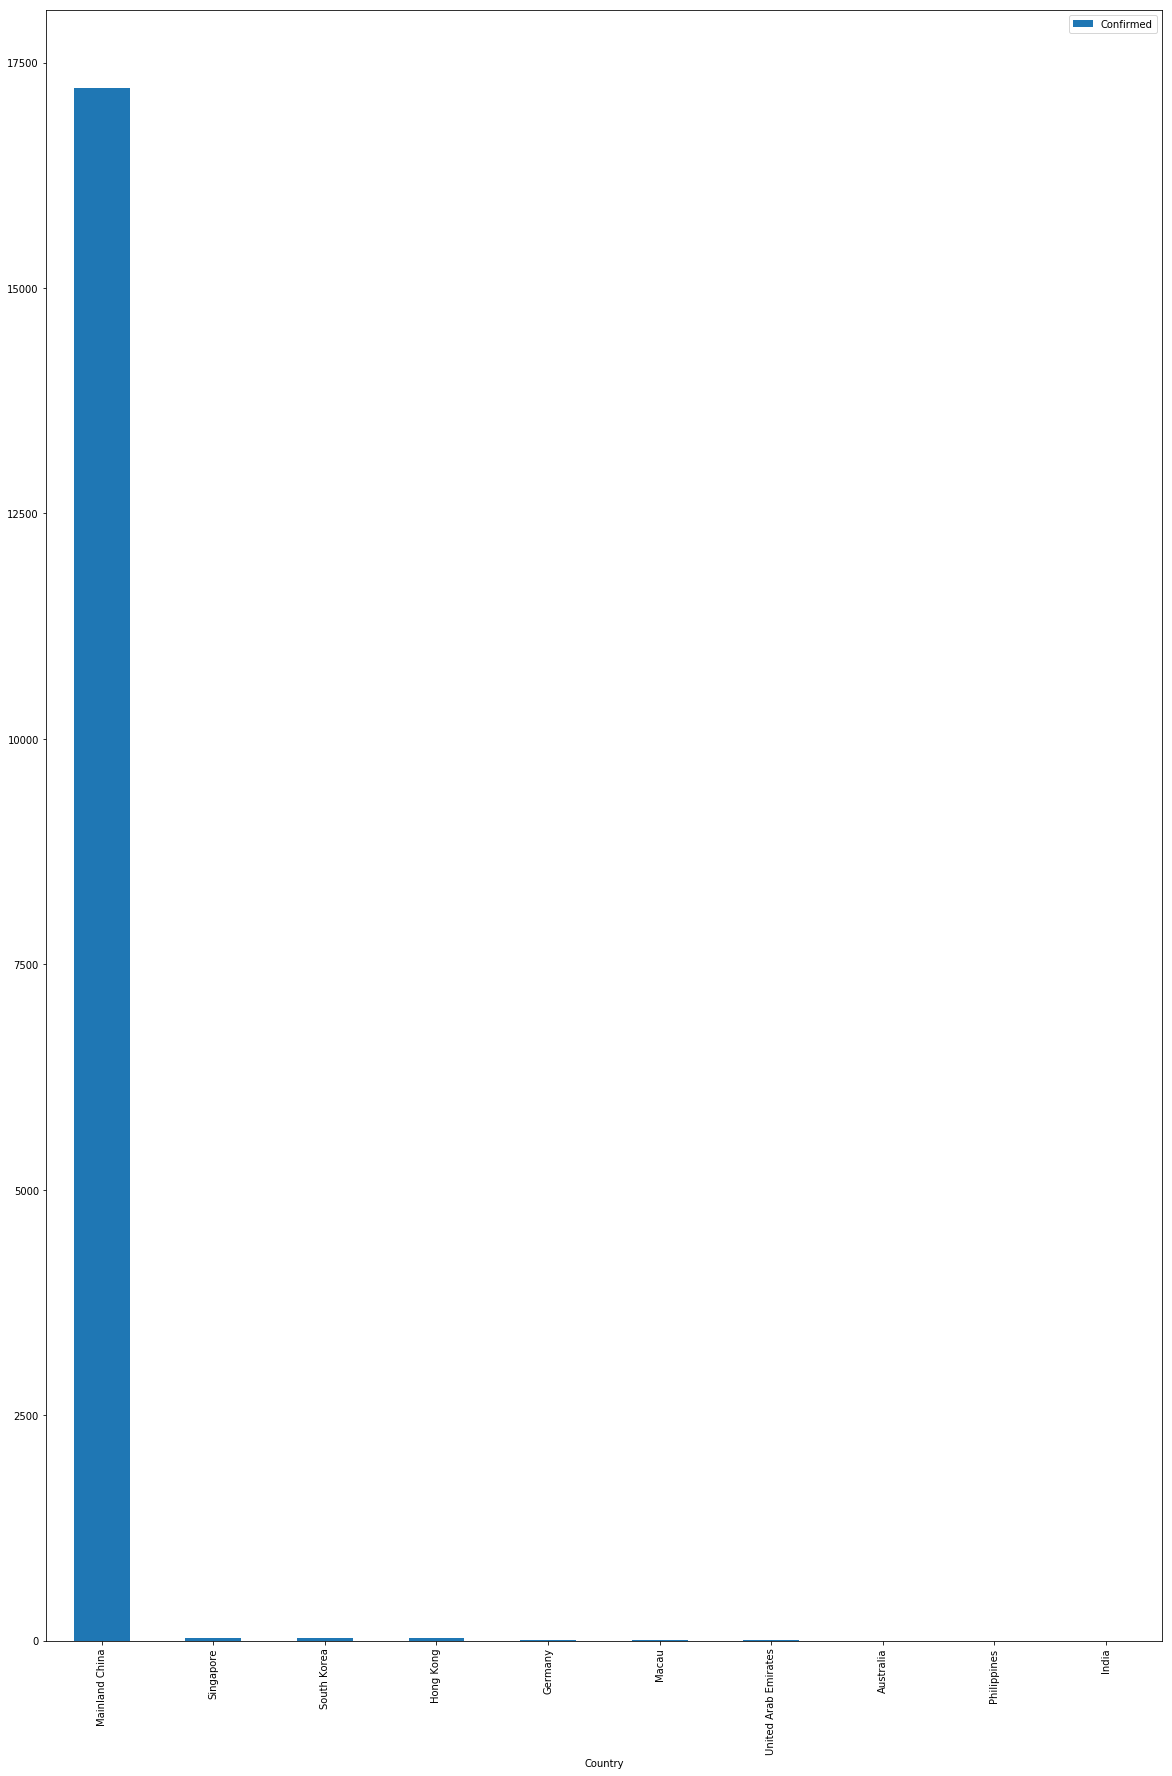

In [29]:
top10_countries.plot('Country',['Confirmed'],kind = 'bar',figsize=(20,30))

In [30]:
data_china=data_final[data_final['Country']=="Mainland China"]

In [31]:
data_china.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-02-01 23:00:00,Zhejiang,Mainland China,2020-02-02 02:13:00,661.0,0.0,23.0
1,2020-02-01 23:00:00,Guangdong,Mainland China,2020-02-02 01:23:00,604.0,0.0,14.0
2,2020-02-01 23:00:00,Henan,Mainland China,2020-02-02 00:53:00,493.0,2.0,4.0
3,2020-02-01 23:00:00,Hunan,Mainland China,2020-02-02 01:53:00,463.0,0.0,8.0
4,2020-02-01 23:00:00,Anhui,Mainland China,2020-02-02 01:33:00,340.0,0.0,5.0


In [32]:
data_china['Province/State'].isnull().sum()

0

In [33]:
data_china=data_china.groupby(["Province/State"]).sum()

In [34]:
data_china.reset_index()

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,340.0,0.0,5.0
1,Beijing,374.0,2.0,18.0
2,Chongqing,300.0,2.0,7.0
3,Fujian,318.0,0.0,0.0
4,Gansu,51.0,0.0,3.0
5,Guangdong,604.0,0.0,14.0
6,Guangxi,111.0,0.0,2.0
7,Guizhou,38.0,0.0,2.0
8,Hainan,63.0,1.0,1.0
9,Hebei,104.0,1.0,3.0


#Hubei has maximum number of cases


In [35]:
data_china10=data_china.nlargest(10,['Confirmed']).reset_index()

In [36]:
data_china10.head()

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,11177.0,350.0,295.0
1,Zhejiang,661.0,0.0,23.0
2,Guangdong,604.0,0.0,14.0
3,Henan,493.0,2.0,4.0
4,Hunan,463.0,0.0,8.0


In [37]:
from matplotlib import pyplot as plt

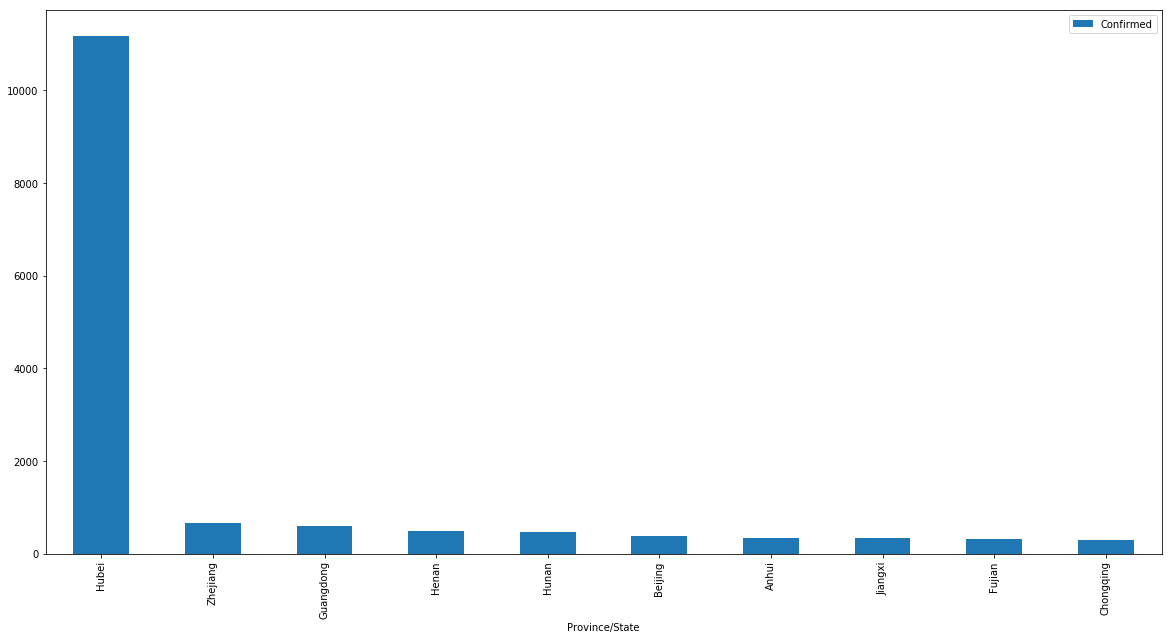

In [38]:
#fig = plt.figure(figsize=(10,))
data_china10.plot('Province/State',['Confirmed'],kind = 'bar',figsize=(20,10))


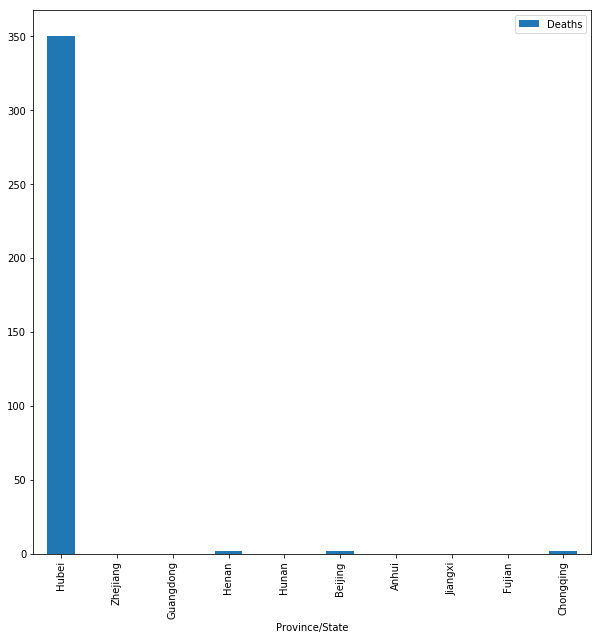

In [39]:

data_china10.plot('Province/State',['Deaths'],kind = 'bar',figsize=(10,10))

In [40]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,Mainland China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,Mainland China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0


In [41]:
data_trend=data[["Date","Confirmed","Deaths","Recovered"]]

In [42]:
data_trend.head()

,Date,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,1.0,0.0,0.0
1,1/22/2020 12:00,14.0,0.0,0.0
2,1/22/2020 12:00,6.0,0.0,0.0
3,1/22/2020 12:00,1.0,0.0,0.0
4,1/22/2020 12:00,0.0,0.0,0.0


In [43]:
data_trend=data_trend.groupby(["Date"]).sum().reset_index()

In [44]:
data_trend

,Date,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,555.0,0.0,0.0
1,1/23/20 12:00 PM,653.0,18.0,30.0
2,1/24/2020 12:00 PM,941.0,26.0,36.0
3,1/25/2020 10:00 PM,2019.0,56.0,49.0
4,1/26/2020 23:00,2794.0,80.0,54.0
5,1/27/2020 20:30,4473.0,107.0,63.0
6,1/28/2020 23:00,6057.0,132.0,110.0
7,1/29/2020 21:00,7783.0,170.0,133.0
8,1/30/2020 21:30,9776.0,213.0,187.0
9,1/31/2020 19:00,11374.0,259.0,252.0


In [45]:
trend=data[["Date","Confirmed","Deaths","Recovered"]]

In [46]:
trend.head()

,Date,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,1.0,0.0,0.0
1,1/22/2020 12:00,14.0,0.0,0.0
2,1/22/2020 12:00,6.0,0.0,0.0
3,1/22/2020 12:00,1.0,0.0,0.0
4,1/22/2020 12:00,0.0,0.0,0.0


In [47]:
trend=trend.groupby(["Date"]).sum().reset_index()

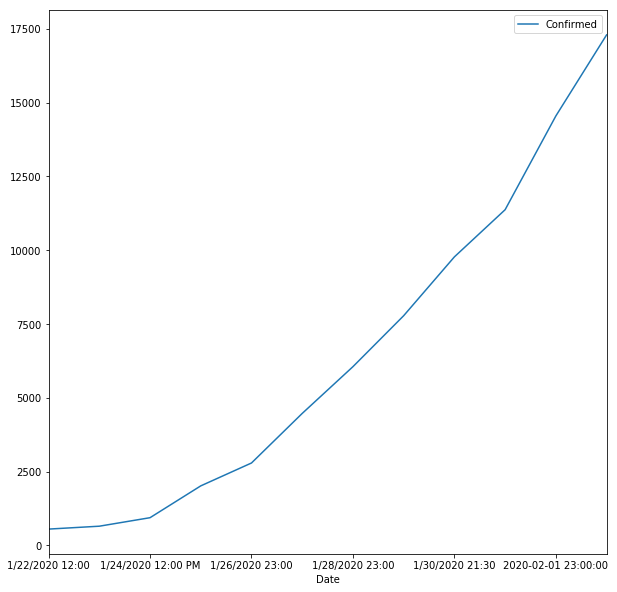

In [48]:
trend.plot('Date',['Confirmed'],figsize=(10,10))

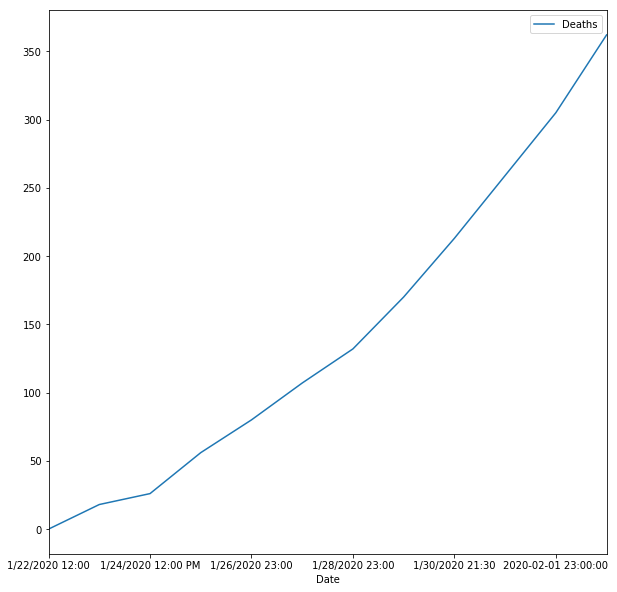

In [49]:
trend.plot('Date',['Deaths'],figsize=(10,10))

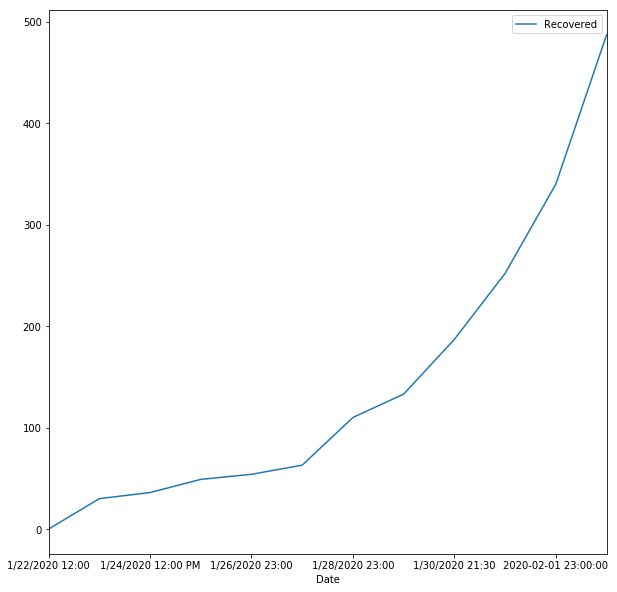

In [50]:
trend.plot('Date',['Recovered'],figsize=(10,10))

In [51]:
import pandas as pd
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [52]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,Mainland China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,Mainland China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0


In [53]:
Nonconfirmed_cases=data.loc[data['Confirmed']==0.0] 

In [54]:
len(Nonconfirmed_cases)

19

In [55]:
Nonconfirmed_cases

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
4,5,1/22/2020 12:00,Gansu,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
10,11,1/22/2020 12:00,Heilongjiang,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
12,13,1/22/2020 12:00,Hong Kong,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
15,16,1/22/2020 12:00,Inner Mongolia,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
18,19,1/22/2020 12:00,Jilin,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
22,23,1/22/2020 12:00,Qinghai,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
23,24,1/22/2020 12:00,Shaanxi,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
30,31,1/22/2020 12:00,Tibet,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
32,33,1/22/2020 12:00,Xinjiang,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0
53,54,1/23/20 12:00 PM,Inner Mongolia,Mainland China,2020-01-23 12:00:00,0.0,0.0,0.0


There are around 19 cases with no confirmation


144 records dont have state/province information


In [56]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,Mainland China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,Mainland China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,Mainland China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,Mainland China,2020-01-22 12:00:00,0.0,0.0,0.0


In [57]:
data1=data[['Date','Country','Confirmed','Deaths','Recovered']]

In [58]:
data1.head()

,Date,Country,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,Mainland China,1.0,0.0,0.0
1,1/22/2020 12:00,Mainland China,14.0,0.0,0.0
2,1/22/2020 12:00,Mainland China,6.0,0.0,0.0
3,1/22/2020 12:00,Mainland China,1.0,0.0,0.0
4,1/22/2020 12:00,Mainland China,0.0,0.0,0.0


In [59]:
data1.dtypes

Date          object
Country       object
Confirmed    float64
Deaths       float64
Recovered    float64
dtype: object

In [60]:
data1['Date']= pd.to_datetime(data1['Date']) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data1.head(10)

,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Mainland China,1.0,0.0,0.0
1,2020-01-22 12:00:00,Mainland China,14.0,0.0,0.0
2,2020-01-22 12:00:00,Mainland China,6.0,0.0,0.0
3,2020-01-22 12:00:00,Mainland China,1.0,0.0,0.0
4,2020-01-22 12:00:00,Mainland China,0.0,0.0,0.0
5,2020-01-22 12:00:00,Mainland China,26.0,0.0,0.0
6,2020-01-22 12:00:00,Mainland China,2.0,0.0,0.0
7,2020-01-22 12:00:00,Mainland China,1.0,0.0,0.0
8,2020-01-22 12:00:00,Mainland China,4.0,0.0,0.0
9,2020-01-22 12:00:00,Mainland China,1.0,0.0,0.0


In [62]:
data1=data1.groupby(["Date"]).sum().reset_index()

In [63]:
data1

,Date,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,555.0,0.0,0.0
1,2020-01-23 12:00:00,653.0,18.0,30.0
2,2020-01-24 12:00:00,941.0,26.0,36.0
3,2020-01-25 22:00:00,2019.0,56.0,49.0
4,2020-01-26 23:00:00,2794.0,80.0,54.0
5,2020-01-27 20:30:00,4473.0,107.0,63.0
6,2020-01-28 23:00:00,6057.0,132.0,110.0
7,2020-01-29 21:00:00,7783.0,170.0,133.0
8,2020-01-30 21:30:00,9776.0,213.0,187.0
9,2020-01-31 19:00:00,11374.0,259.0,252.0


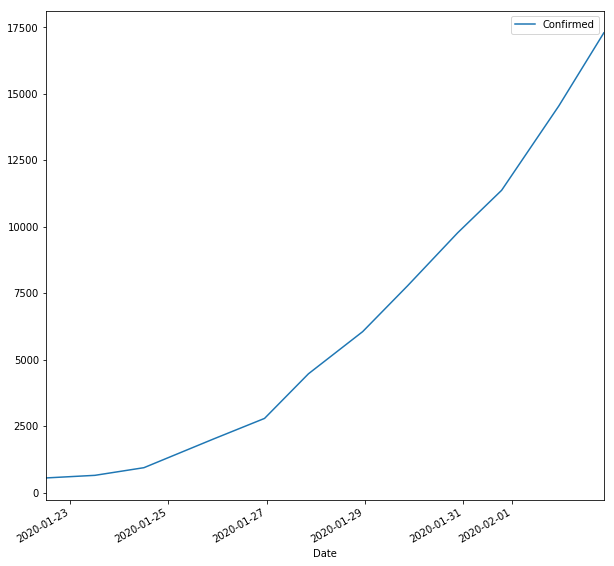

In [64]:
data1.plot('Date',['Confirmed'],figsize=(10,10))

In [65]:
data1=data1.drop(['Deaths','Recovered'],axis=1)

In [66]:
data1

,Date,Confirmed
0,2020-01-22 12:00:00,555.0
1,2020-01-23 12:00:00,653.0
2,2020-01-24 12:00:00,941.0
3,2020-01-25 22:00:00,2019.0
4,2020-01-26 23:00:00,2794.0
5,2020-01-27 20:30:00,4473.0
6,2020-01-28 23:00:00,6057.0
7,2020-01-29 21:00:00,7783.0
8,2020-01-30 21:30:00,9776.0
9,2020-01-31 19:00:00,11374.0


In [67]:
data1.set_index('Date',inplace=True)


In [68]:
data1=data1.diff()

In [69]:
data1=data1.fillna(555)
data1.reset_index(inplace=True)

In [70]:
data1

,Date,Confirmed
0,2020-01-22 12:00:00,555.0
1,2020-01-23 12:00:00,98.0
2,2020-01-24 12:00:00,288.0
3,2020-01-25 22:00:00,1078.0
4,2020-01-26 23:00:00,775.0
5,2020-01-27 20:30:00,1679.0
6,2020-01-28 23:00:00,1584.0
7,2020-01-29 21:00:00,1726.0
8,2020-01-30 21:30:00,1993.0
9,2020-01-31 19:00:00,1598.0


In [71]:
data1.columns = ['ds', 'y']
data1

,ds,y
0,2020-01-22 12:00:00,555.0
1,2020-01-23 12:00:00,98.0
2,2020-01-24 12:00:00,288.0
3,2020-01-25 22:00:00,1078.0
4,2020-01-26 23:00:00,775.0
5,2020-01-27 20:30:00,1679.0
6,2020-01-28 23:00:00,1584.0
7,2020-01-29 21:00:00,1726.0
8,2020-01-30 21:30:00,1993.0
9,2020-01-31 19:00:00,1598.0


I am going to use FB Prophet for this predition

In [72]:
from fbprophet import Prophet


My model is predicting for next 15 days if the condition remains similar and virus is not contained by any means****

In [73]:
m = Prophet()
m.fit(data1)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22 12:00:00,-8877.625130,-307.197146,292.747644,-8877.625130,-8877.625130,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,0.0,0.0,0.0,9.145512
1,2020-01-23 12:00:00,-8572.940470,9.658354,624.438705,-8572.940470,-8572.940470,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,0.0,0.0,0.0,313.830170
2,2020-01-24 12:00:00,-8268.255811,339.071350,908.952330,-8268.255811,-8268.255811,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,8886.770641,0.0,0.0,0.0,618.514830
3,2020-01-25 22:00:00,-7836.619210,731.344674,1323.835228,-7836.619210,-7836.619210,8867.611878,8867.611878,8867.611878,8867.611878,8867.611878,8867.611878,0.0,0.0,0.0,1030.992668
4,2020-01-26 23:00:00,-7519.239356,705.137527,1324.304744,-7519.239356,-7519.239356,8555.627857,8555.627857,8555.627857,8555.627857,8555.627857,8555.627857,0.0,0.0,0.0,1036.388501
5,2020-01-27 20:30:00,-7246.292681,1319.615431,1905.107010,-7246.292681,-7246.292681,8865.793872,8865.793872,8865.793872,8865.793872,8865.793872,8865.793872,0.0,0.0,0.0,1619.501191
6,2020-01-28 23:00:00,-6909.869261,1331.833081,1958.956200,-6909.869261,-6909.869261,8555.627857,8555.627857,8555.627857,8555.627857,8555.627857,8555.627857,0.0,0.0,0.0,1645.758596
7,2020-01-29 21:00:00,-6630.574346,1362.888524,1951.154129,-6630.574346,-6630.574346,8294.713050,8294.713050,8294.713050,8294.713050,8294.713050,8294.713050,0.0,0.0,0.0,1664.138704
8,2020-01-30 21:30:00,-6319.541373,1709.470114,2319.893929,-6319.541373,-6319.541373,8325.496914,8325.496914,8325.496914,8325.496914,8325.496914,8325.496914,0.0,0.0,0.0,2005.955541
9,2020-01-31 19:00:00,-6046.594070,1306.369634,1897.444104,-6046.594070,-6046.594070,7651.798157,7651.798157,7651.798157,7651.798157,7651.798157,7651.798157,0.0,0.0,0.0,1605.204087


In [74]:
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:1682, 'yhat']-data1['y'])**2)) )

RMSE: 232.891368


In [75]:
future.tail()

,ds
22,2020-02-13 21:00:00
23,2020-02-14 21:00:00
24,2020-02-15 21:00:00
25,2020-02-16 21:00:00
26,2020-02-17 21:00:00


In [76]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22 12:00:00,9.145512,-307.197146,292.747644
1,2020-01-23 12:00:00,313.830170,9.658354,624.438705
2,2020-01-24 12:00:00,618.514830,339.071350,908.952330
3,2020-01-25 22:00:00,1030.992668,731.344674,1323.835228
4,2020-01-26 23:00:00,1036.388501,705.137527,1324.304744


In [77]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22,2020-02-13 21:00:00,6234.419128,5935.603840,6523.309402
23,2020-02-14 21:00:00,6539.104490,6239.613832,6835.263970
24,2020-02-15 21:00:00,6843.789851,6554.499072,7150.610526
25,2020-02-16 21:00:00,7148.475213,6830.594321,7444.849303
26,2020-02-17 21:00:00,7453.160574,7155.512027,7756.821668


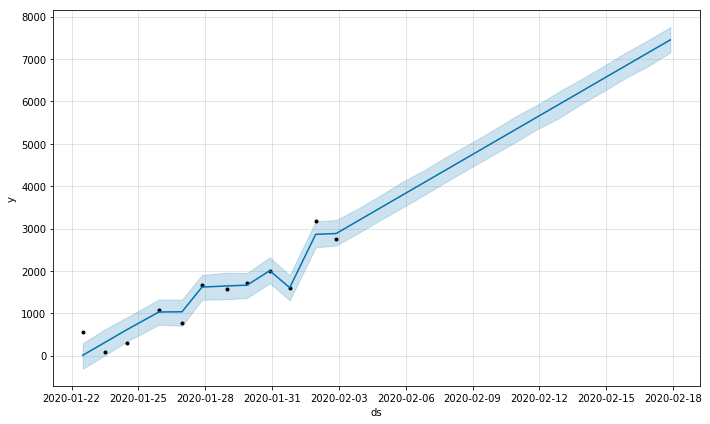

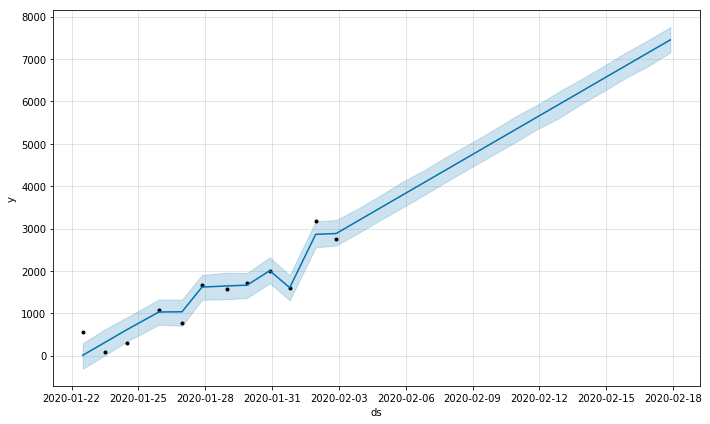

In [78]:
m.plot(forecast,
              uncertainty=True)

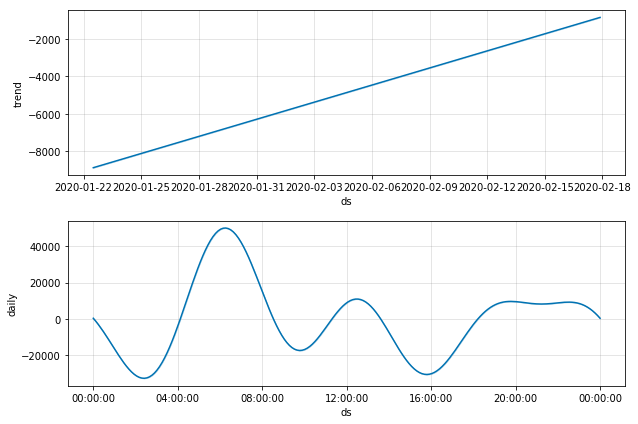

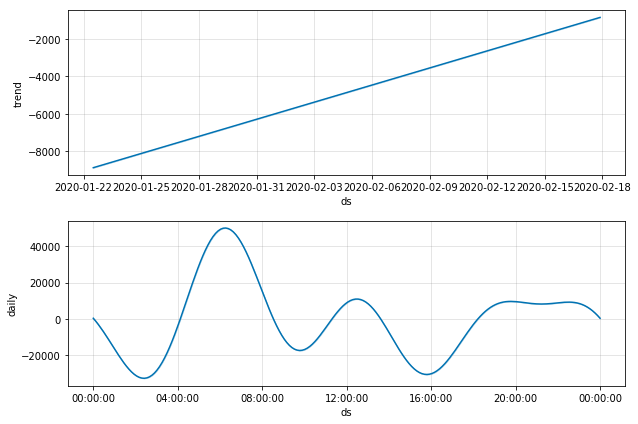

In [79]:
m.plot_components(forecast)

In [80]:
d1=forecast[['ds','yhat']]

In [81]:
d1.head()

,ds,yhat
0,2020-01-22 12:00:00,9.145512
1,2020-01-23 12:00:00,313.830170
2,2020-01-24 12:00:00,618.514830
3,2020-01-25 22:00:00,1030.992668
4,2020-01-26 23:00:00,1036.388501


In [82]:
d1['total predicted cases']=d1['yhat'].cumsum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
d1=d1.drop(['yhat'],axis=1)

In [84]:
d1.head()

,ds,total predicted cases
0,2020-01-22 12:00:00,9.145512
1,2020-01-23 12:00:00,322.975682
2,2020-01-24 12:00:00,941.490512
3,2020-01-25 22:00:00,1972.483180
4,2020-01-26 23:00:00,3008.871682


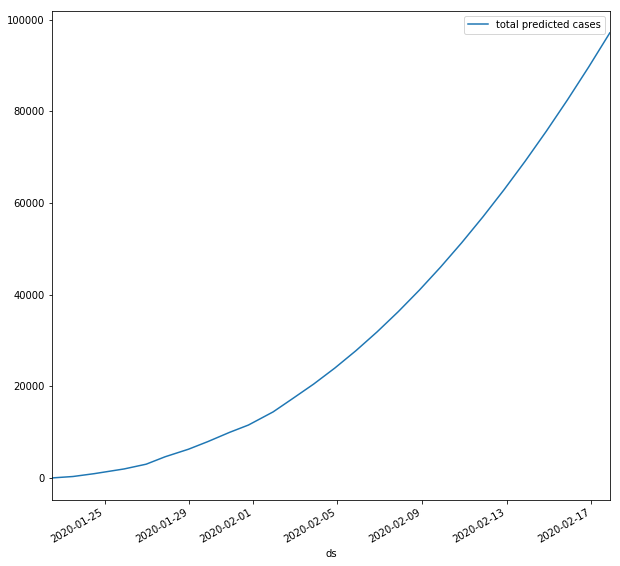

In [85]:
d1.plot('ds',['total predicted cases'],figsize=(10,10))

**It shows that the number of confirmed cases will go above 90000 if no measure are taken for containing virus infection **

Please give any suggestion if you think I could have done differently
